### Etapa 1: Leitura de pagamentos futuros a partir de planilha Excel

Vamos ler um arquivo Excel com datas, descrições e valores de pagamentos.
A ideia é prever se o caixa será suficiente para o próximo mês.


In [2]:
import pandas as pd
import datetime

# Caminho do arquivo
arquivo_excel = "fluxo_pagamentos.xlsx"

# Leitura
pagamentos = pd.read_excel(arquivo_excel)

# Garantir que a coluna 'Data' está em formato datetime
pagamentos["Data"] = pd.to_datetime(pagamentos["Data"])

# Saldo atual
saldo_atual = 1000

# Data de hoje
hoje = datetime.date.today()

# Mês seguinte
prox_mes = hoje + pd.DateOffset(months=1)

# Filtra pagamentos do próximo mês
pagamentos_prox_mes = pagamentos[
    (pagamentos["Data"].dt.month == prox_mes.month) &
    (pagamentos["Data"].dt.year == prox_mes.year)
]

# Total a pagar
total = pagamentos_prox_mes["Valor"].sum()

# Saldo previsto
saldo_previsto = saldo_atual - total

# Exibição
print(f"Saldo atual: R${saldo_atual:.2f}")
print(f"Pagamentos previstos ({prox_mes.strftime('%B/%Y')}): R${total:.2f}")
print(f"Saldo previsto: R${saldo_previsto:.2f}")


Saldo atual: R$1000.00
Pagamentos previstos (July/2025): R$2750.00
Saldo previsto: R$-1750.00


### Etapa 4: Envio automático de alerta por e-mail

Se o saldo previsto estiver negativo, o sistema envia um alerta automático para os responsáveis financeiros da empresa.
No caso da empresa fictícia, o sistema enviará um e-mail para eu e Edgar (integrantes do grupo).


In [3]:
def enviar_alerta_email(saldo_previsto):
    msg = EmailMessage()
    msg["Subject"] = "🚨 Alerta: Necessidade de Capital de Giro"
    msg["From"] = "SEU_EMAIL@gmail.com"  # substitua aqui
    msg["To"] = ["pedromatiasrj@gmail.com", "edgarallan0080@gmail.com"]
    
    msg.set_content(f"""
    Atenção!

    O saldo projetado para o próximo mês está negativo: R${saldo_previsto:.2f}
    A previsão de pagamentos excede o caixa disponível.

    Verifique se será necessário antecipar receitas ou buscar crédito para manter a operação saudável.

    -- Sistema de Monitoramento de Caixa
    """)

    # Conexão com o servidor SMTP do Gmail
    with smtplib.SMTP_SSL("smtp.gmail.com", 465) as smtp:
        smtp.login("SEU_EMAIL@gmail.com", "SUA_SENHA_DE_APP")  # substitua aqui
        smtp.send_message(msg)
        print("📩 Alerta enviado com sucesso para os responsáveis.")

# Executar a lógica condicional
if saldo_previsto < 0:
    enviar_alerta_email(saldo_previsto)
else:
    print("✅ Saldo suficiente. Nenhum alerta enviado.")


NameError: name 'EmailMessage' is not defined

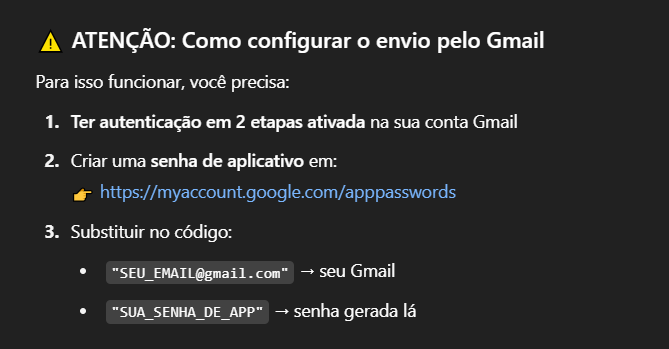
